# Representación de los papers

## Como sacar el PIT

### Sacar el PIT del ideal

In [3]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

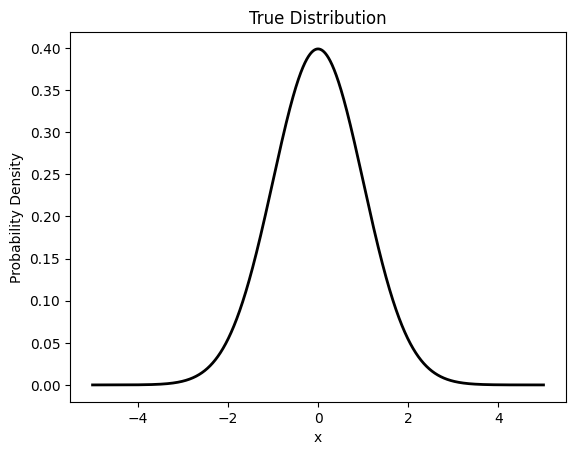

In [24]:


x = np.linspace(-5.0, 5.0, num=100000)
# mean and standard deviation
mu = 0
sigma = 1

# sample the distribution
number_of_samples = 500
samples = np.random.normal(mu, sigma, number_of_samples)
samples.sort()

# get sample parameters
sample_mean = np.mean(samples)
sample_std = np.std(samples)

true_distribution = stats.norm.pdf(x, mu, sigma)

# plot the true distribution
plt.plot(x, true_distribution, linewidth=2, color="black")
plt.title("True Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()


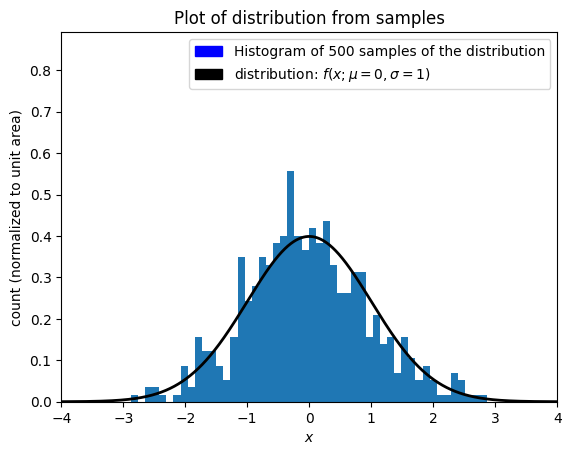

In [25]:
n_bins = 1
if number_of_samples < 50:
    n_bins = number_of_samples
else:
    n_bins = 50

# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(
    samples, n_bins, density=True
)  # Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, true_distribution, linewidth=2, color="black")

# Axes
plt.title("Plot of distribution from samples")
plt.xlabel("$x$")
plt.ylabel("count (normalized to unit area)")
sample_window_w = sample_std * 1.5
# plt.xlim([sample_mean - sample_window_w, sample_mean + sample_window_w])
plt.xlim([-4, 4])
plt.ylim([0, hist_count.max() * 1.6])

# Legends
sample_patch = mpatches.Patch(
    color="black", label=fr"distribution: $f(x;\mu={mu},\sigma={sigma})$"
)
data_patch = mpatches.Patch(
    color="blue",
    label=f"Histogram of {number_of_samples} samples of the distribution",
)

plt.legend(handles=[data_patch, sample_patch])

plt.show()

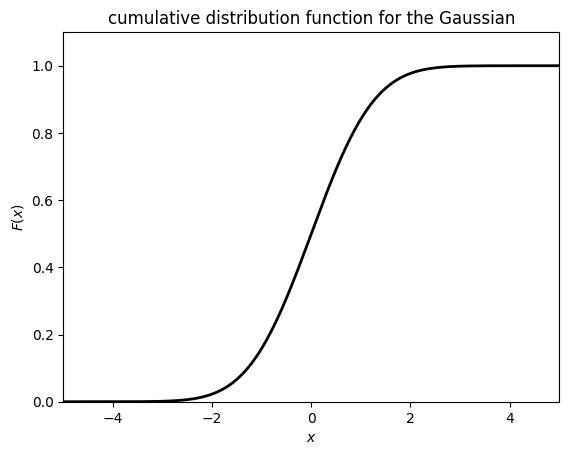

In [26]:
# Plots
plt.figure(1)

# Plot distribution using sample parameters
plt.plot(x, stats.norm.cdf(x), linewidth=2, color="black")

# Axes
plt.title("cumulative distribution function for the Gaussian")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")

plt.xlim([-5, 5])
plt.ylim([0, 1.1])

plt.show()

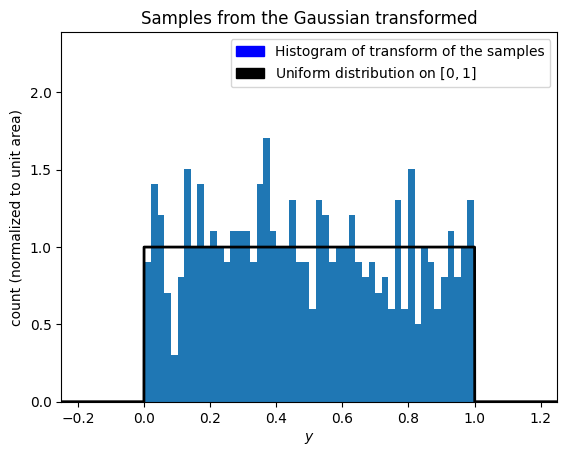

In [27]:
output = stats.norm.cdf(samples)
# print(output)
# uniform distribution
uniform_distribution = stats.uniform.pdf(x)
# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(
    output, n_bins, density=True
)  # Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, uniform_distribution, linewidth=2, color="black")
# Axes
plt.title("Samples from the Gaussian transformed")
plt.xlabel("$y$")
plt.ylabel("count (normalized to unit area)")

plt.xlim([-0.25, 1.25])
plt.ylim([0, hist_count.max() * 1.4])

# Legends
sample_patch = mpatches.Patch(
    color="black", label=f"Uniform distribution on $[{0},{1}]$"
)
data_patch = mpatches.Patch(color="blue", label="Histogram of transform of the samples")

plt.legend(handles=[data_patch, sample_patch])

plt.show()

the uniformity of the **PIT** values is a necessary but not a sufﬁcient condition for the forecaster to be ideal

the **PIT** cannot distinguish between the ideal forecaster and her competitors

### PIT no uniformes

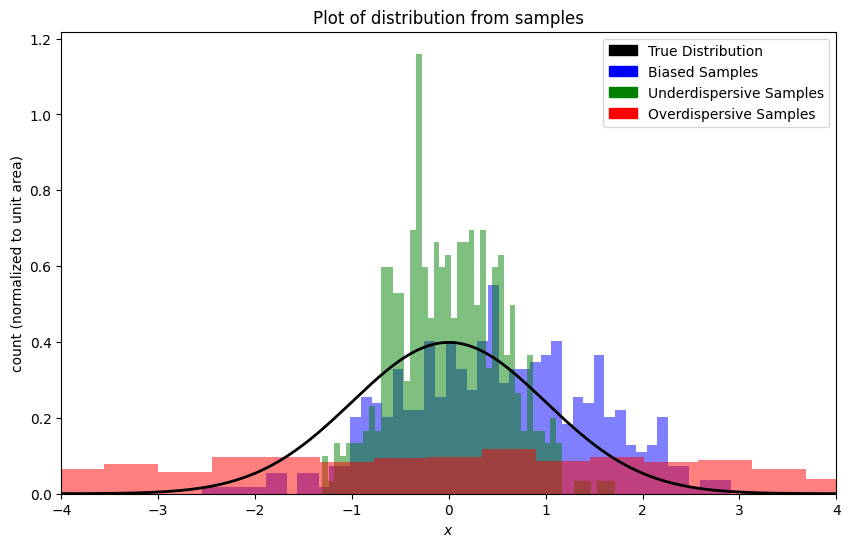

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats

# Definir el rango de valores para x
x = np.linspace(-5, 5, 1000)

# Calcular las funciones de densidad de probabilidad (PDF) para true_distribution
true_distribution = stats.norm.pdf(x, 0, 1)

# Generar samples para cada distribución
samples_biased = np.random.normal(0.5, 1, 500)
samples_under = np.random.normal(0, 0.75**2, 500)
samples_over = np.random.normal(0, 2**2, 500)

# Ordenar los samples
samples_biased.sort()
samples_under.sort()
samples_over.sort()

# Número de bins para el histograma
number_of_samples = 500
n_bins = 1
if number_of_samples < 50:
    n_bins = number_of_samples
else:
    n_bins = 50

# Plots
plt.figure(figsize=(10, 6))
# Histograma de los samples
hist_count, bins, _ = plt.hist(samples_biased, n_bins, density=True, alpha=0.5, color="blue")
hist_count, bins, _ = plt.hist(samples_under, n_bins, density=True, alpha=0.5, color="green")
hist_count, bins, _ = plt.hist(samples_over, n_bins, density=True, alpha=0.5, color="red")

# Plot distribución usando los parámetros de los samples
plt.plot(x, true_distribution, linewidth=2, color="black")

# Ejes
plt.title("Plot of distribution from samples")
plt.xlabel("$x$")
plt.ylabel("count (normalized to unit area)")
plt.xlim([-4, 4])

# Leyendas
sample_patch = mpatches.Patch(color="blue", label="Biased Samples")
sample_patch2 = mpatches.Patch(color="green", label="Underdispersive Samples")
sample_patch3 = mpatches.Patch(color="red", label="Overdispersive Samples")
data_patch = mpatches.Patch(color="black", label="True Distribution")
plt.legend(handles=[data_patch, sample_patch, sample_patch2, sample_patch3])

plt.show()


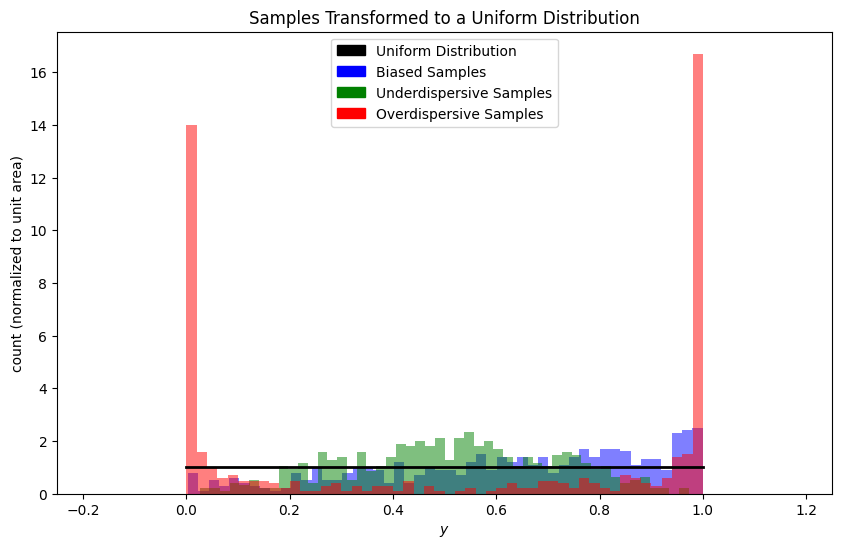

In [36]:
cdf_biased = stats.norm.cdf(samples_biased)
cdf_under = stats.norm.cdf(samples_under)
cdf_over = stats.norm.cdf(samples_over)


plt.figure(figsize=(10, 6))

# Histograma de las transformaciones de los samples
hist_count, bins, _ = plt.hist(cdf_biased, n_bins, density=True, alpha=0.5, color="blue")
hist_count, bins, _ = plt.hist(cdf_under, n_bins, density=True, alpha=0.5, color="green")
hist_count, bins, _ = plt.hist(cdf_over, n_bins, density=True, alpha=0.5, color="red")

# Distribución uniforme en [0,1]
uniform_distribution = stats.uniform.pdf(np.linspace(0, 1, 1000))

# Graficar la distribución uniforme
plt.plot(np.linspace(0, 1, 1000), uniform_distribution, linewidth=2, color="black")

# Ejes y etiquetas
plt.title("Samples Transformed to a Uniform Distribution")
plt.xlabel("$y$")
plt.ylabel("count (normalized to unit area)")
plt.xlim([-0.25, 1.25])

# Leyendas
sample_patch = mpatches.Patch(color="blue", label="Biased Samples")
sample_patch2 = mpatches.Patch(color="green", label="Underdispersive Samples")
sample_patch3 = mpatches.Patch(color="red", label="Overdispersive Samples")
data_patch = mpatches.Patch(color="black", label="Uniform Distribution")
plt.legend(handles=[data_patch, sample_patch, sample_patch2, sample_patch3])

plt.show()

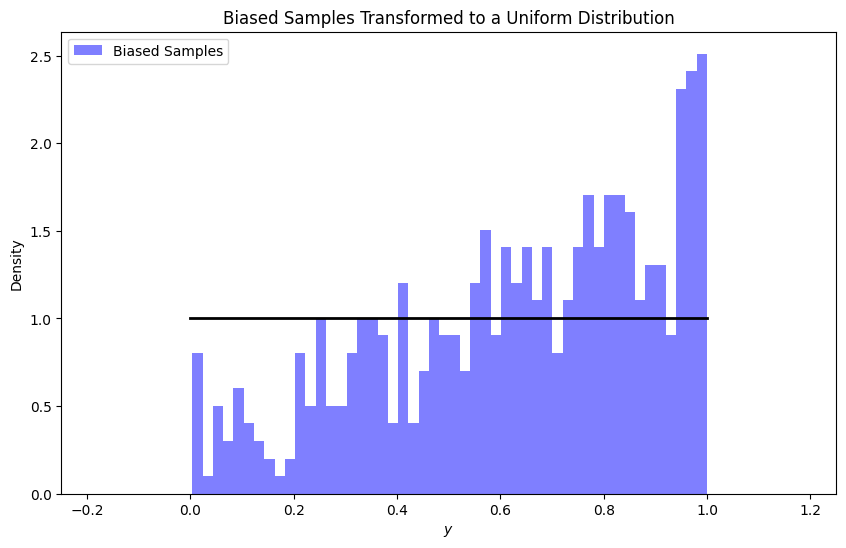

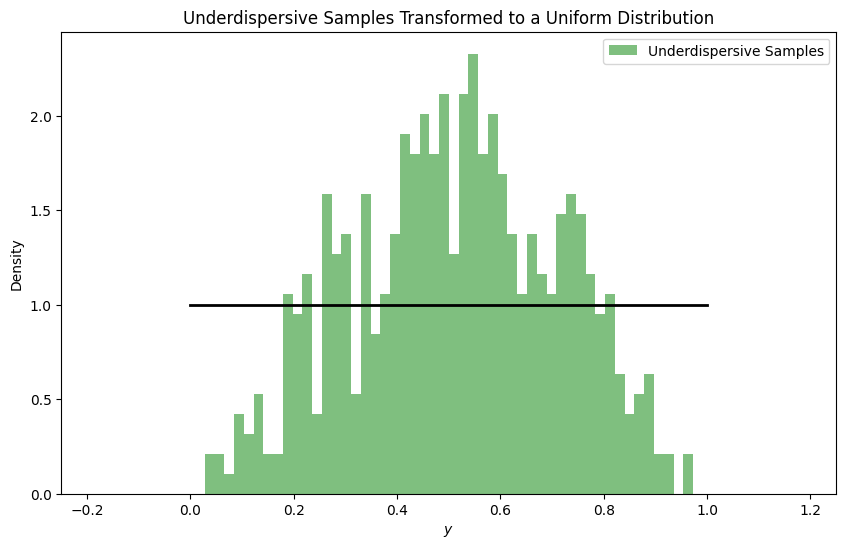

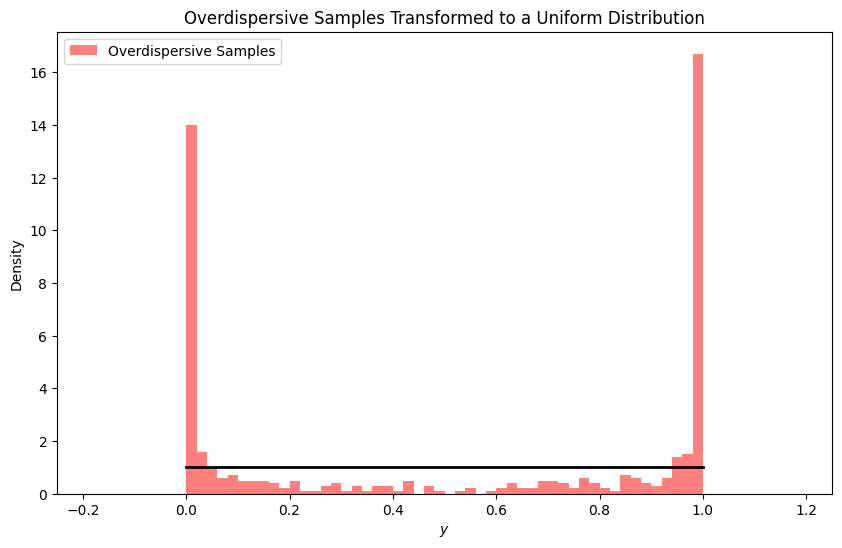

In [39]:
plt.figure(figsize=(10, 6))


# Histograma de las transformaciones de los samples - Biased
plt.hist(cdf_biased, n_bins, density=True, alpha=0.5, color="blue", label="Biased Samples")

# Distribución uniforme en [0,1]
uniform_distribution = stats.uniform.pdf(np.linspace(0, 1, 1000))

# Graficar la distribución uniforme
plt.plot(np.linspace(0, 1, 1000), uniform_distribution, linewidth=2, color="black")

# Ejes y etiquetas
plt.title("Biased Samples Transformed to a Uniform Distribution")
plt.xlabel("$y$")
plt.ylabel("Density")
plt.xlim([-0.25, 1.25])

# Leyendas
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
# Histograma de las transformaciones de los samples - Underdispersive
plt.hist(cdf_under, n_bins, density=True, alpha=0.5, color="green", label="Underdispersive Samples")

# Graficar la distribución uniforme
plt.plot(np.linspace(0, 1, 1000), uniform_distribution, linewidth=2, color="black")

# Ejes y etiquetas
plt.title("Underdispersive Samples Transformed to a Uniform Distribution")
plt.xlabel("$y$")
plt.ylabel("Density")
plt.xlim([-0.25, 1.25])

# Leyendas
plt.legend()

plt.show()

# Plots
plt.figure(figsize=(10, 6))

# Histograma de las transformaciones de los samples - Overdispersive
plt.hist(cdf_over, n_bins, density=True, alpha=0.5, color="red", label="Overdispersive Samples")

# Graficar la distribución uniforme
plt.plot(np.linspace(0, 1, 1000), uniform_distribution, linewidth=2, color="black")

# Ejes y etiquetas
plt.title("Overdispersive Samples Transformed to a Uniform Distribution")
plt.xlabel("$y$")
plt.ylabel("Density")
plt.xlim([-0.25, 1.25])

# Leyendas
plt.legend()

plt.show()

## Calibraciones

**Las calibraciones son condiciones que al cumplirse se esta mas cerca de la realidad, en este caso se refiere a que los valores de la predicción estén cerca de la realidad.**

1. Probabilistic calibration is essentially equivalent to the uniformity of the PIT values. 

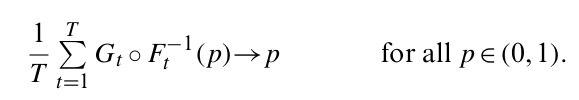

2. Exceedance calibration is deﬁned in terms of thresholds

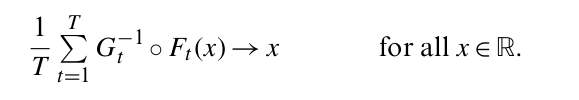

3. marginal calibration requires that the limit distributions Ḡ and F̄ exist and equal each other.

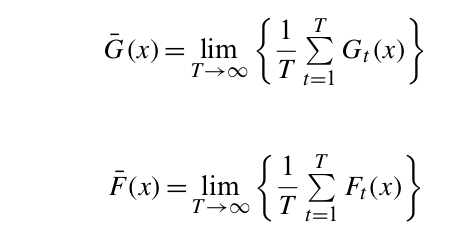

## Sharpness principle

ideal forecasts and the maximization of sharpness subject to calibration are equivalent

## CRPS

The CRPS — Continuous Ranked Probability Score — is a score function that compares a single ground truth
value to a Cumulative Distribution Function (CDF):
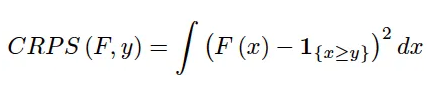


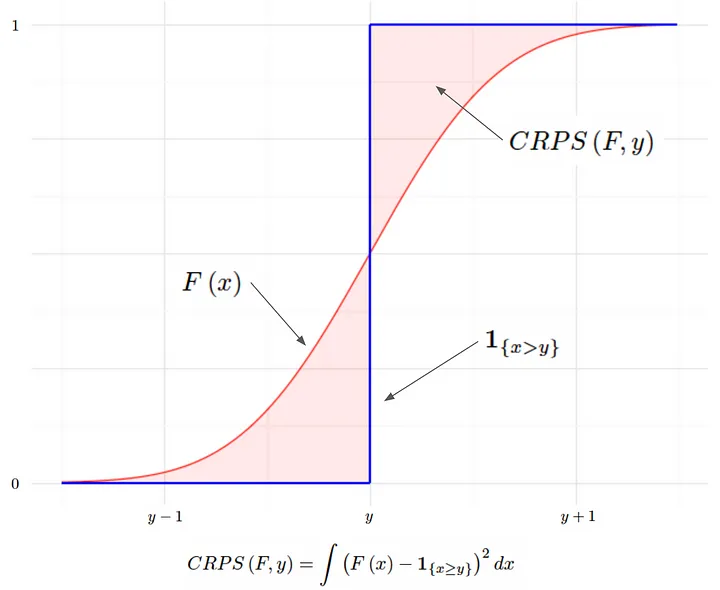

In [30]:
import numpy as np
from scipy import stats

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

In [31]:
# Adapted to numpy from pyro.ops.stats.crps_empirical
# Copyright (c) 2017-2019 Uber Technologies, Inc.
# SPDX-License-Identifier: Apache-2.0

def crps_nrg(y_true, y_pred, sample_weight=None):
    num_samples = y_pred.shape[0]
    absolute_error = np.mean(np.abs(y_pred - y_true), axis=0)

    y_pred = np.sort(y_pred, axis=0)
    diff = y_pred[1:] - y_pred[:-1]
    weight = np.arange(1, num_samples) * np.arange(num_samples - 1, 0, -1)
    weight = np.expand_dims(weight, -1)

    per_obs_crps = absolute_error - np.sum(diff * weight, axis=0) / num_samples**2
    return np.average(per_obs_crps, weights=sample_weight)


def crps_pwm(y_true, y_pred, sample_weight=None):
    num_samples = y_pred.shape[0]
    absolute_error = np.mean(np.abs(y_pred - y_true), axis=0)

    y_pred = np.sort(y_pred, axis=0)
    b0 = y_pred.mean(axis=0)
    b1_values = y_pred * np.arange(num_samples).reshape((num_samples, 1))
    b1 = b1_values.mean(axis=0) / num_samples

    per_obs_crps = absolute_error + b0 - 2 * b1
    return np.average(per_obs_crps, weights=sample_weight)


def crps_gaussian(x, mu, sig, sample_weight=None):
    sx = (x - mu) / sig
    pdf = stats.norm.pdf(sx)
    cdf = stats.norm.cdf(sx)
    per_obs_crps = sig * (sx * (2 * cdf - 1) + 2 * pdf - 1. / np.sqrt(np.pi))
    return np.average(per_obs_crps, weights=sample_weight)

In [32]:
dataset = fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.2, random_state=17
)

model = BayesianRidge()
model.fit(x_train, y_train)
pred_mean, pred_std = model.predict(x_test, return_std=True)

# create simulation-predictions
predictions = stats.multivariate_normal.rvs(pred_mean, np.diag(pred_std ** 2), 10_000, 17)

In [33]:
print(f'The CRPS with the PWM implementation is: {crps_pwm(y_test, predictions)}')

print(f'The CRPS with the NRG implementation is: {crps_nrg(y_test, predictions)}')

# in this simple case, we can use the analytic solution of CRPS for normal distribution:
print(f'The CRPS with the analytical solution is: {crps_gaussian(y_test, pred_mean, pred_std)}')

The CRPS with the PWM implementation is: 0.4102556101058135
The CRPS with the NRG implementation is: 0.41004993237982496
The CRPS with the analytical solution is: 0.4100037421740885
